In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import holoviews as hv

import numpy as np
import pandas as pd
import pickle as pk
from time import time

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')


In [2]:
# read in data
start=time()
# print('reading in data...')
with open('data_all.pk','rb') as fp:
    foo = pk.load(fp)
# print('elapsed: ',time()-start)

for x in foo:
    stmp = x+"= foo['"+x+"']"
    exec(stmp)

**Consensus clustering and map**

In [3]:
# from Consensus import *
# NB:  scoping problem seems to prevent import from working properly.
# instead use exec below.

In [359]:
country_display = None
exec(open('Consensus.py','r').read())

In [360]:
#foo = Consensus(cases=['deaths','cases','cases_nonlinr'])
foo = Consensus()

In [361]:
cases;

In [362]:
# import warnings
# warnings.simplefilter('error', RuntimeWarning)   # to replace warnings by errors to allow traceback
# warnings.simplefilter('error',DeprecationWarning)

In [363]:
# loop over 24 scans: 4* cases index + scoring method (max validity or min score options) 0 to 3:
# 0 validity = max(validity,0.001)
# 1 validitysc = rescale(validity,ncomp)  # rescaled to account for biasses in number of components of projection
# 2 score1 = 1.0/validitysc + float(nunclustered)/5. + np.abs(float(nclus)-4.)/2.  # penalizes additively
# 3 score2 = float(nunclustered)*(4.+np.abs(nclus-4.))/(validitysc*20.)            # penalizes multiplicatively : all criteria required
foo.scan(diag=False) # default diag=False for no output except progress bar

In [364]:
foo.make_clusters()

reference clustering (numbered from 0) is 7


In [365]:
mycols = [i for i,r in enumerate(foo.report) if ('deaths,' in foo.report[i] or 'cases,' in foo.report[i] or 'cases_nonlinr,' in foo.report[i])]

In [366]:
mycols;

In [367]:
foo.coldata.shape;

In [368]:
fofo = np.array([foo.coldata[0:,ii,0:] for ii in mycols])
fofo.shape;

In [369]:
foo.swizzle(cols=mycols,satthresh=0.6)

In [370]:
classes2 = foo.classes

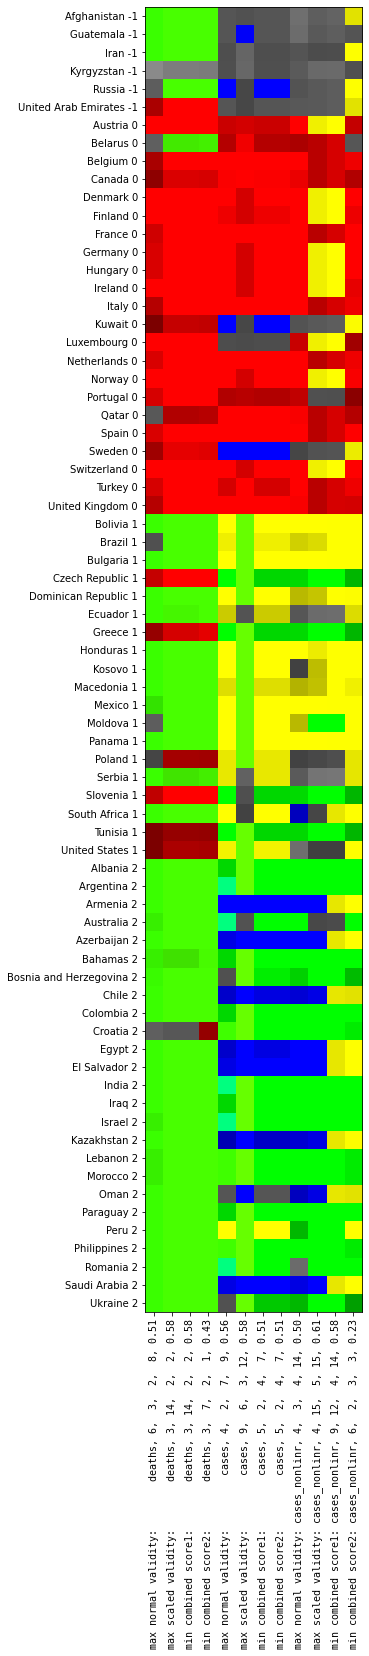

In [371]:
foo.plot_swiz()

In [372]:
def myplot(dataname='deaths',country='Australia'):
    plt.plot(clusdata_all[dataname][country])
    
country_display = interactive(myplot,dataname=cases,country=dcountries);
display(country_display)

interactive(children=(Dropdown(description='dataname', options=('deaths', 'cases', 'cases_lin2020', 'cases_pwl…

In [373]:
foo.make_map()

In [374]:
foo.map

Map(center=[20, 10], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

TypeError: 'float' object is not iterable

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TypeError: 'float' object is not iterable

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TypeError: 'float' object is not iterable

TypeError: 'float' object is not iterable

TraitError: Invalid selection: value not found

TypeError: 'float' object is not iterable

TraitError: Invalid selection: value not found

TypeError: 'float' object is not iterable

TraitError: Invalid selection: value not found

TraitError: Invalid selection: value not found

TypeError: 'float' object is not iterable

In [227]:
cclist = [cc for cc in geog.name]
# print(cclist)

['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antarctica', 'French Southern and Antarctic Lands', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', 'Ivory Coast', 'Cameroon', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Colombia', 'Costa Rica', 'Cuba', 'Northern Cyprus', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'Falkland Islands', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea Bissau', 'Equatorial Guinea', 'Greece', 'Greenland', 'Guatemala', 'Guyana', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', '

In [229]:
print(bcountries)

['Afghanistan', 'Albania', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Belarus', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Myanmar', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Swaziland', 'Finland', 'France', 'Gambia', 'Germany', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'India', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Libya', 'Luxembourg', 'Mauritania', 'Mexico', 'Moldova', 'Montenegro', 'Morocco', 'Namibia', 'Netherlands', 'Macedonia', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Tunisia', 'Turkey', 'United States', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Palestine', '